# T-distributed Stochastic Neighbor Embedding (t-SNE) Algorithm - ML

T-distributed Stochastic Neighbor Embedding (t-SNE) is a "non linear dimensionality reduction technique" used for visualizing high-dimensional data in a lower-dimensional space mainly in 2D or 3D. Unlike linear methods such as Principal Component Analysis (PCA), t-SNE focus on preserving the "local structure and pattern of the data".

"Dimensionality reduction" is a process that simplifies complex dataset by combining similar or correlated features. It helps in improving analysis and computational efficiency.

t-SNE works by looking at the similarity between data points in the high-dimensional space. The similarity is computed as a conditional probability. It calculates how likely it is that one data point would be near another.

In [21]:
# =========================================================================================================================================================================
# Let's first import the important libraries:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
# ==========================================================================================================================================================================================

In [22]:
# Load dataset
data = load_iris()
X = data.data
y = data.target
# ==========================================================================================================================================================================================
# Scale the features
X = StandardScaler().fit_transform(X)
# ==========================================================================================================================================================================================

In [23]:
# ==========================================================================================================================================================================================
def pairwise_distances(X):
    sum_X = np.sum(np.square(X), 1)
    D = np.add(np.add(-2 * np.dot(X, X.T), sum_X).T, sum_X)
    return D
# ==========================================================================================================================================================================================

In [24]:
# ==========================================================================================================================================================================================
def compute_pij(X, sigma=1.0):
    D = pairwise_distances(X)
    P = np.exp(-D / (2 * sigma ** 2))
    np.fill_diagonal(P, 0)
    P /= np.sum(P)
    return (P + P.T) / (2 * X.shape[0])
# ==========================================================================================================================================================================================

In [25]:
# ==========================================================================================================================================================================================
def initialize_Y(n, dim=2):
    return np.random.randn(n, dim) * 0.0001
# ==========================================================================================================================================================================================

In [26]:
# ==========================================================================================================================================================================================
def compute_qij(Y):
    D = pairwise_distances(Y)
    Q = 1 / (1 + D)
    np.fill_diagonal(Q, 0)
    Q /= np.sum(Q)
    return Q
# ==========================================================================================================================================================================================    

In [27]:
# ==========================================================================================================================================================================================
def compute_gradient(P, Q, Y):
    n, dim = Y.shape
    dY = np.zeros((n, dim))
    PQ_diff = P - Q
    for i in range(n):
        dY[i, :] = np.sum(
            (PQ_diff[:, i].reshape(-1, 1) * (Y[i, :] - Y)) * (1 / (1 + np.sum((Y[i, :] - Y)**2, axis=1)).reshape(-1, 1)),
            axis=0
        )
    return 4 * dY
# ==========================================================================================================================================================================================

In [28]:
def tsne(X, iterations=300, learning_rate=100, sigma=1.0):
    n = X.shape[0]
    Y = initialize_Y(n)
    P = compute_pij(X, sigma)
    
    for it in range(iterations):
        Q = compute_qij(Y)
        grads = compute_gradient(P, Q, Y)
        Y -= learning_rate * grads
        
        if it % 50 == 0:
            C = np.sum(P * np.log((P + 1e-12) / (Q + 1e-12)))
            print(f"Iteration {it}: KL Divergence = {C:.4f}")
    return Y
    # ==========================================================================================================================================================================================

Iteration 0: KL Divergence = -0.0278
Iteration 50: KL Divergence = -0.0226
Iteration 100: KL Divergence = -0.0223
Iteration 150: KL Divergence = -0.0222
Iteration 200: KL Divergence = -0.0222
Iteration 250: KL Divergence = -0.0222


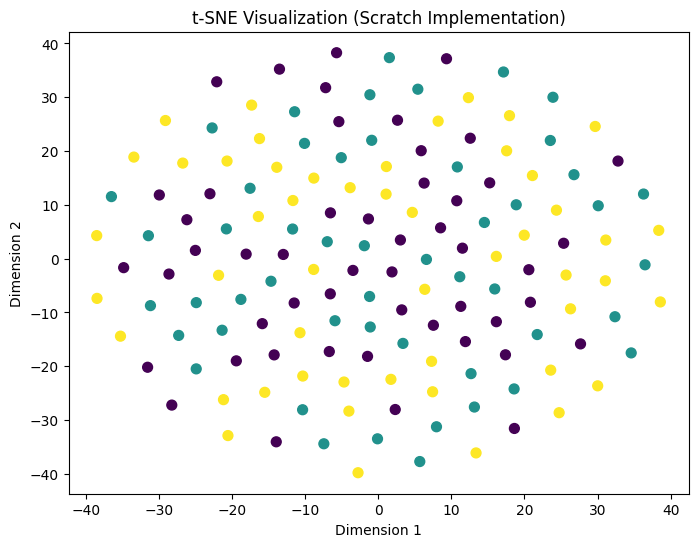

In [29]:
Y = tsne(X, iterations=300, learning_rate=100, sigma=1.0)

plt.figure(figsize=(8,6))
plt.scatter(Y[:, 0], Y[:, 1], c=y, cmap='viridis', s=50)
plt.title("t-SNE Visualization (Scratch Implementation)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()
# ==========================================================================================================================================================================================

In [30]:
# ===============================
#Now, t-SNE Visualization on Wine Dataset
# ==========================================================================================================================================================================================

from sklearn.datasets import load_wine
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
# ==========================================================================================================================================================================================

In [31]:
# Step 2: Loading  and Preprocessing of Data
wine = load_wine()
X = wine.data
y = wine.target
# ==========================================================================================================================================================================================
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Original Shape:", X_scaled.shape)
# ==========================================================================================================================================================================================

Original Shape: (178, 13)


In [32]:
# Step 3: Apply PCA to reduce noise & speed up t-SNE
pca = PCA(n_components=12, random_state=42)
X_pca = pca.fit_transform(X_scaled)
print("After PCA Shape:", X_pca.shape)
# ==========================================================================================================================================================================================

After PCA Shape: (178, 12)


In [33]:
# Step 4: Apply t-SNE
tsne = TSNE(
    n_components=2,      # Reduce to 2D for visualization
    perplexity=30,       # Balance between local/global structure
    learning_rate=200,   # Step size for optimization
    max_iter=1000,         # Number of iterations
    random_state=42
)

X_tsne = tsne.fit_transform(X_pca)
print("After t-SNE Shape:", X_tsne.shape)

# ==========================================================================================================================================================================================

After t-SNE Shape: (178, 2)


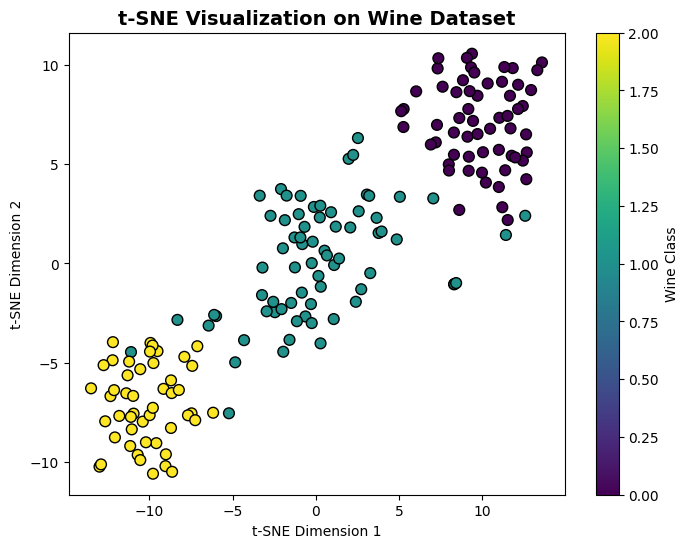

In [34]:
# Step 5: Visualization
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=60, edgecolor='k')
plt.title("t-SNE Visualization on Wine Dataset", fontsize=14, fontweight='bold')
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.colorbar(label="Wine Class")
plt.show()

# ==========================================================================================================================================================================================

<Figure size 1200x600 with 0 Axes>

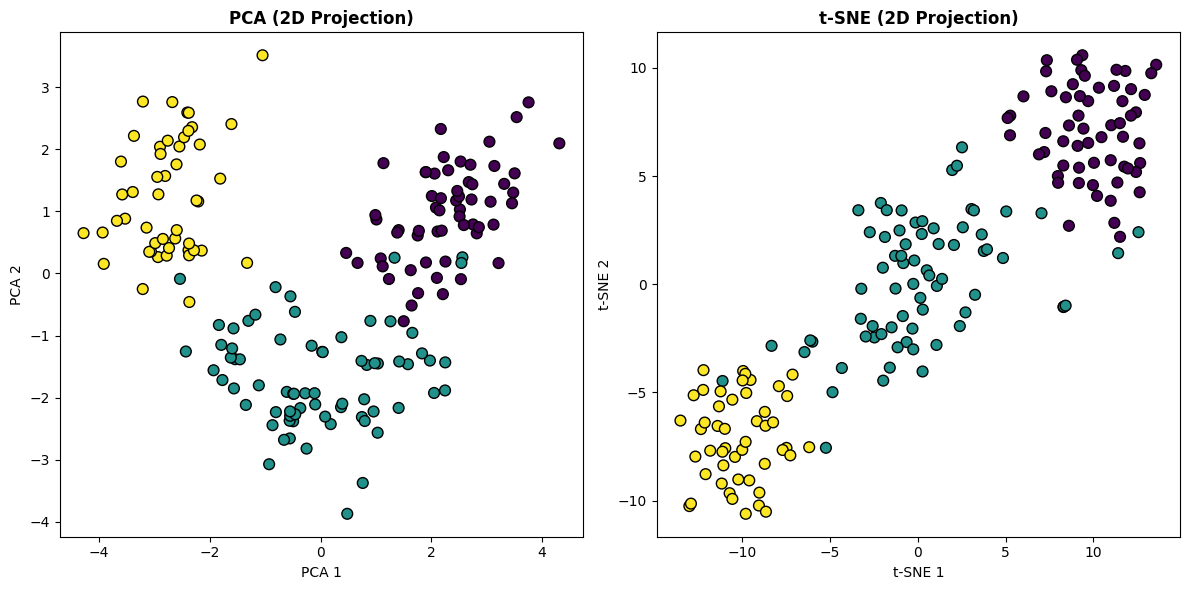

In [35]:
# Step 6: Compararision (PCA vs t-SNE) visually
X_pca2 = PCA(n_components=2, random_state=42).fit_transform(X_scaled)

plt.figure(figsize=(12,6))

# PCA plot
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=y, cmap='viridis', s=60, edgecolor='k')
plt.title("PCA (2D Projection)", fontsize=12, fontweight='bold')
plt.xlabel("PCA 1"); plt.ylabel("PCA 2")
# ==========================================================================================================================================================================================
# t-SNE plot

plt.subplot(1,2,2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=60, edgecolor='k')
plt.title("t-SNE (2D Projection)", fontsize=12, fontweight='bold')
plt.xlabel("t-SNE 1"); plt.ylabel("t-SNE 2")

plt.tight_layout()
plt.show()
# ==========================================================================================================================================================================================

In [36]:
# Hence,I successfuly implemented t-SNE algorithm on Wine dataset and clearly point out that how it differs from PCA and finally analyzed that it's more sensitive and natural than PCA.
# This algorithms doesn't only find linear relation but also explores non-linear relation among the features by focussing on the Local patterns.